# Quickstart in 5 minutes

In order to run your first Deepchecks Suite all you need to have is the data and model that you which to validate. More specifically, you need:

- DataFrames with your train and test data
- (optional) A model that supports the scikit-learn API. Required for running checks that need the model's predictions for running.

To run your first suite you only need 6 lines of code, that start here: [Define a Dataset Object](#Define-a-Dataset-Object).

## Load Data, Split Train-Val, and Train a Simple Model

For the purpose of this guide we'll use the simple iris dataset and train a simple random forest model for multiclass classification:

In [1]:
# General imports
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
np.random.seed(22)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Data
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Train Model
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

## Define a Dataset Object

Initialize the Dataset object, stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. date column, index column).

In [2]:
from deepchecks import Dataset

# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred
# If the dataset has categorical features, the best practice is to pass a list with their names

ds_train = Dataset(df_train, label_name=label_col, cat_features=[], use_default_index=False)
ds_test =  Dataset(df_test,  label_name=label_col, cat_features=[])

## Run Overall Check Suite

Use the overall suite that is a collection of (most of) the prebuilt checks:

In [3]:
from deepchecks.suites import overall_suite

suite = overall_suite()

Overall Suite 
 The suite is composed of various checks such as: Train Test Feature Drift, Whole Dataset Drift, Index Train Test Leakage, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status 
 Check 
 Condition 
 More Info 
 
 
 
 
 ✖ 
 Single Feature Contribution - Train Dataset 
 Features' Predictive Power Score (PPS) is not greater than 0.8 
 Features with PPS above threshold: petal width (cm), petal length (cm) 
 
 
 ✖ 
 Single Feature Contribution - Test Dataset 
 Features' Predictive Power Score (PPS) is not greater than 0.8 
 Features with PPS above threshold: petal length (cm), petal width (cm) 
 
 
 ✓ 
 Train Test Drift 
 PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively 
 
 
 
 ✓ 
 Mixed Nulls - Test Dataset 
 Not more than 1 different null types for all columns 
 
 
 
 ✓ 
 Mixed Types - Train Dataset 
 Rare type ratio is not less than 1.00% of samples in all columns 
 
 
 
 ✓ 
 Mixed Types - Test Dataset 
 Rare type ratio is not less than 1.00% of samples in all columns 
 
 
 
 ✓ 
 String Mismatch - Train Dataset 
 No string variants for all columns 
 
 
 
 ✓ 
 String Mismatch - Test Dataset 
 No string variants for all columns 
 
 
 
 ✓ 
 Data Duplicates - Train Dataset 
 Duplicate data is not greater than 0% 
 
 
 
 ✓ 
 Data Duplicates - Test Dataset 
 Duplicate data is not greater than 0% 
 
 
 
 ✓ 
 String Length Out Of Bounds - Train Dataset 
 Ratio of outliers not greater than 0% string length outliers for all columns 
 
 
 
 ✓ 
 String Length Out Of Bounds - Test Dataset 
 Ratio of outliers not greater than 0% string length outliers for all columns 
 
 
 
 ✓ 
 Special Characters - Train Dataset 
 Ratio of entirely special character samples not greater than 0.10% for all columns 
 
 
 
 ✓ 
 Special Characters - Test Dataset 
 Ratio of entirely special character samples not greater than 0.10% for all columns 
 
 
 
 ✓ 
 Label Ambiguity - Train Dataset 
 Ambiguous sample ratio is not greater than 0% 
 
 
 
 ✓ 
 Label Ambiguity - Test Dataset 
 Ambiguous sample ratio is not greater than 0% 
 
 
 
 ✓ 
 String Mismatch Comparison 
 No new variants allowed in test data for all columns 
 
 
 
 ✓ 
 Mixed Nulls - Train Dataset 
 Not more than 1 different null types for all columns 
 
 
 
 ✓ 
 Single Value in Column - Test Dataset 
 Does not contain only a single value for all columns 
 
 
 
 ✓ 
 Single Value in Column - Train Dataset 
 Does not contain only a single value for all columns 
 
 
 
 ✓ 
 New Label Train Test 
 Number of new label values is not greater than 0 
 
 
 
 ✓ 
 Whole Dataset Drift 
 Drift value is not greater than 0.25 
 
 
 
 ✓ 
 Train Test Samples Mix 
 Percentage of test data samples that appear in train data not greater than 10.00% 
 
 
 
 ✓ 
 Single Feature Contribution Train-Test 
 Train-Test features' Predictive Power Score (PPS) difference is not greater than 0.2 
 
 
 
 ✓ 
 Train-Test Difference Overfit 
 Train-Test metrics degradation ratio is not greater than 0.1 
 
 
 
 ✓ 
 Unused Features 
 Number of high variance unused features is not greater than 5 
 
 
 
 ✓ 
 Model Inference Time Check - Train Dataset 
 Average model inference time for one sample is not greater than 0.001 
 
 
 
 ✓ 
 Category Mismatch Train Test 
 Number of new category values is not greater than 0 for all columns 
 
 
 
 ✓ 
 Model Inference Time Check - Test Dataset 
 Average model inference time for one sample is not greater than 0.001 
 
 
 
 ✓ 
 Datasets Size Comparison 
 Test-Train size ratio is not smaller than 0.01 
 
 
 
 ✓ 
 Simple Model Comparison 
 Ratio not less than 1.1 between the given model's result and the simple model's result 
 
 
 
 ✓ 
 ROC Report - Train Dataset 
 Not less than 0.7 AUC score for all the classes 
 
 
 
 ✓ 
 ROC Report - Test Dataset 
 Not less than 0.7 AUC score for all the classes 
 
 
 
 ✓ 
 Class Performance Imbalance - Train Dataset 
 Relative ratio difference between labels 'F1' score is not greater than 30.00% 
 
 
 
 ✓ 
 Class Performance Imbalance - Test Dataset 
 Relative ratio difference between labels 'F1' score is not greater than 30.00% 
 
 
 
 ✓ 
 Datasets Size Comparison 
 Train dataset is not smaller than test data

Additional Outputs

Train Test Drift

Calculate drift between train dataset and test dataset per feature, using statistical measures.

The Drift score is a measure for the difference between two distributions, in this check - the test
 and train distributions. The check shows the drift score and distributions for the features, sorted by
 feature importance and showing only the top 5 features, according to feature importance.
 If available, the plot titles also show the feature importance (FI) rank.

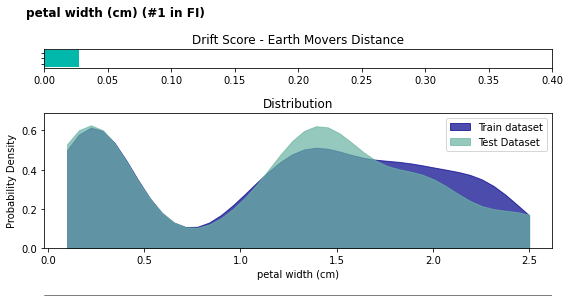

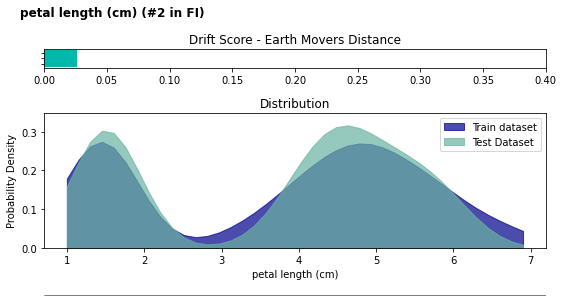

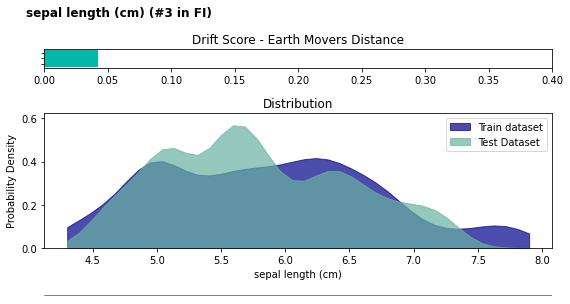

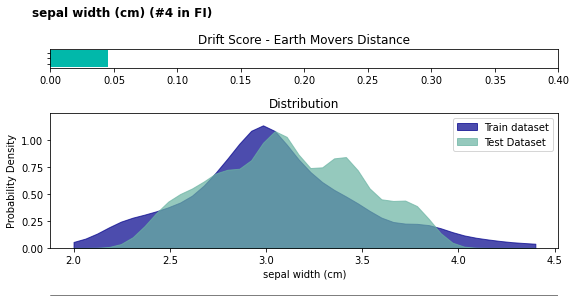

Whole Dataset Drift

Calculate drift between the entire train and test datasets using a model trained to distinguish between them.

The shown features are the features that are most important for the domain classifier - the
 domain_classifier trained to distinguish between the train and test datasets. The percents of
 explained dataset difference are the calculated feature importance values for the feature.

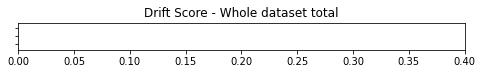

Main features contributing to drift

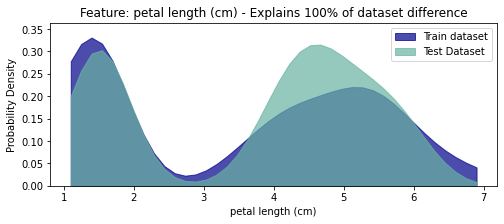

Train Test Samples Mix

Detect samples in the test data that appear also in training data.

2.63% (1.0 / 38) of test data samples appear in train data

sepal length (cm) 
 sepal width (cm) 
 petal length (cm) 
 petal width (cm) 
 target 
 
 
 
 
 Test indices: 142 
 5.80 
 2.70 
 5.10 
 1.90 
 2 
 
 
 Train indices: 101 
 5.80 
 2.70 
 5.10 
 1.90 
 2

Single Feature Contribution - Train Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

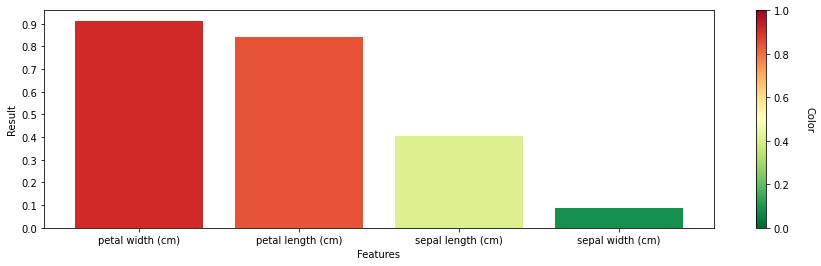

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution - Test Dataset

Return the PPS (Predictive Power Score) of all features in relation to the label.

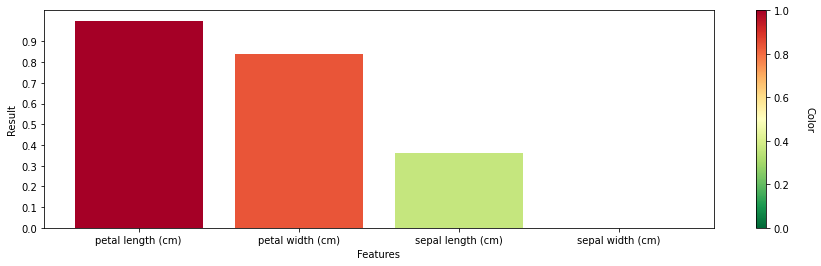

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

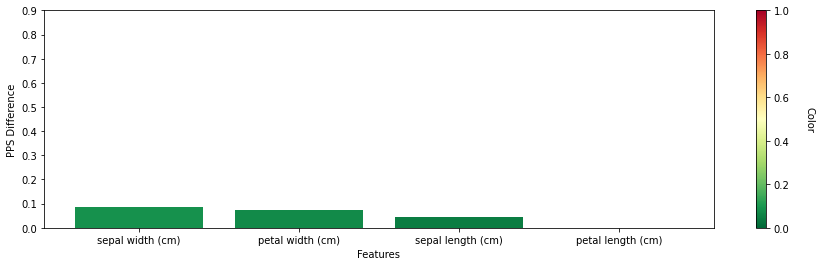

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

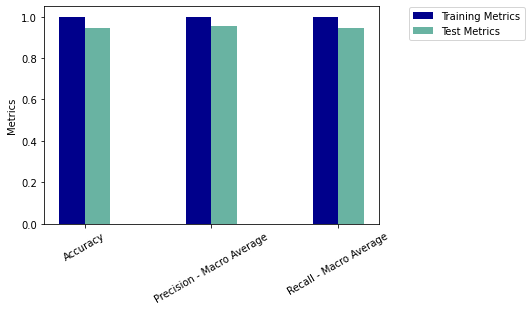

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

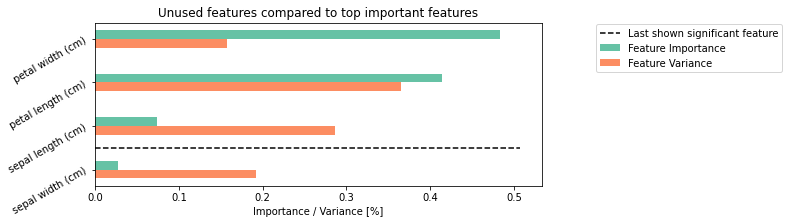

Model Inference Time Check - Train Dataset

Measure model average inference time (in seconds) per sample.

Average model inference time for one sample (in seconds): 0.00010816

Model Inference Time Check - Test Dataset

Measure model average inference time (in seconds) per sample.

Average model inference time for one sample (in seconds): 0.00032136

Datasets Size Comparison

Verify test dataset size comparing it to the train dataset size.

Train 
 Test 
 
 
 
 
 Size 
 112 
 38

Performance Report - Train Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 1.00 
 
 
 Precision - Macro Average 
 1.00 
 
 
 Recall - Macro Average 
 1.00

Performance Report - Test Dataset

Summarize given metrics on a dataset and model.

Score 
 
 
 Metric 
   
 
 
 
 
 Accuracy 
 0.95 
 
 
 Precision - Macro Average 
 0.96 
 
 
 Recall - Macro Average 
 0.94

Simple Model Comparison

Compare given model score to simple model score (according to given model type).

The given model performs 2.77 times compared to the simple model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 0.95 compared to Simple constant prediction which achieved a score of 0.34 on tested data.

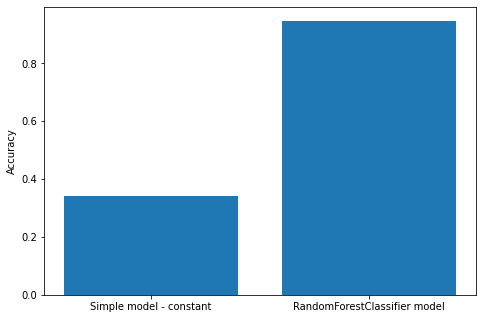

Confusion Matrix Report - Train Dataset

Calculate the confusion matrix of the model on the given dataset.

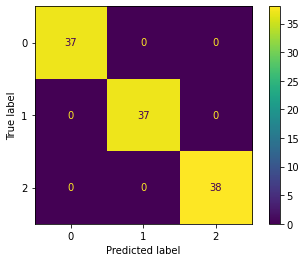

Confusion Matrix Report - Test Dataset

Calculate the confusion matrix of the model on the given dataset.

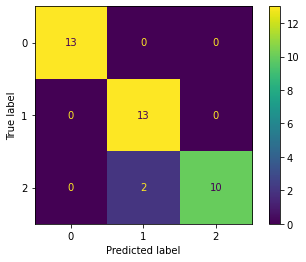

ROC Report - Train Dataset

Calculate the AUC (Area Under Curve) for each class.

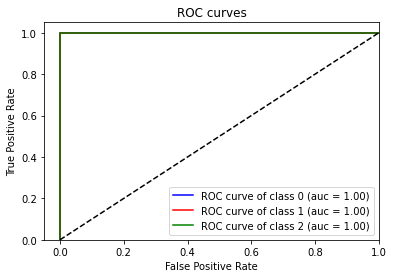

ROC Report - Test Dataset

Calculate the AUC (Area Under Curve) for each class.

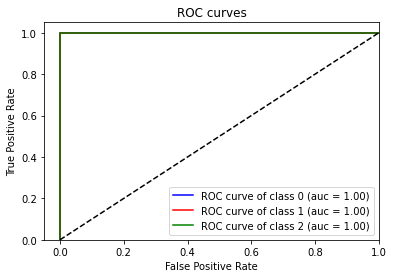

Calibration Metric - Train Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

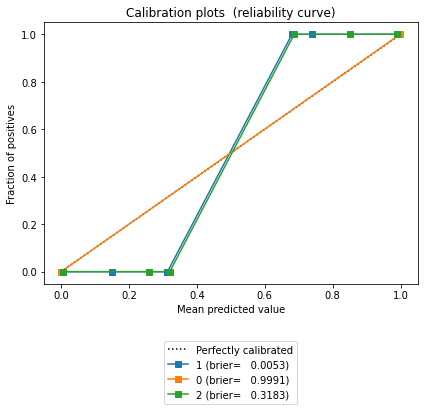

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Calibration Metric - Test Dataset

Calculate the calibration curve with brier score for each class.

Calibration curves (also known as reliability diagrams) compare how well the probabilistic predictions of a binary classifier are calibrated. It plots the true frequency of the positive label against its predicted probability, for binned predictions.

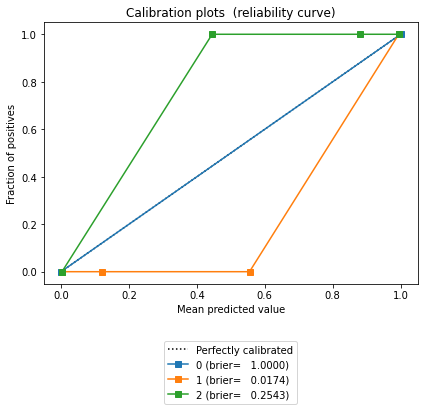

The Brier score metric may be used to assess how well a classifier is calibrated. For more info, please visit https://en.wikipedia.org/wiki/Brier_score

Class Performance Imbalance - Train Dataset

Visualize class imbalance by displaying the difference between class score values.

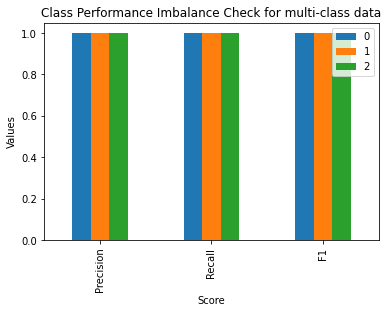

Class Performance Imbalance - Test Dataset

Visualize class imbalance by displaying the difference between class score values.

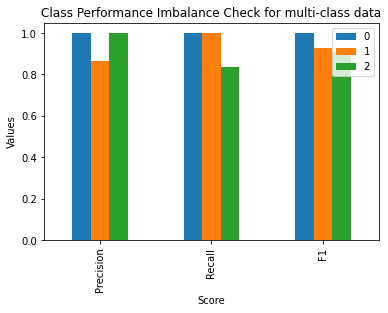

Other Checks That Weren't Displayed 
 
 
 
 
 Check 
 Reason 
 
 
 
 
 Index Train Test Leakage 
 DeepchecksValueError: Check requires dataset to have an index column 
 
 
 Date Train Test Leakage Duplicates 
 DeepchecksValueError: Check requires dataset to have a date column 
 
 
 Date Train Test Leakage Overlap 
 DeepchecksValueError: Check requires dataset to have a date column 
 
 
 Boosting Overfit 
 DeepchecksValueError: Unsupported model of type: RandomForestClassifier 
 
 
 Trust Score Comparison 
 DeepchecksValueError: Number of samples in test dataset have not passed the minimum. you can change minimum samples needed to run with parameter "min_test_samples" 
 
 
 Regression Systematic Error 
 DeepchecksValueError: Expected model to be a type from ['regression'], but received model of type: multiclass 
 
 
 Regression Error Distribution 
 DeepchecksValueError: Expected model to be a type from ['regression'], but received model of type: multiclass 
 
 
 String Mismatch Comparison 
 Nothing found 
 
 
 Label Ambiguity - Test Dataset 
 Nothing found 
 
 
 Label Ambiguity - Train Dataset 
 Nothing found 
 
 
 Special Characters - Test Dataset 
 Nothing found 
 
 
 Special Characters - Train Dataset 
 Nothing found 
 
 
 String Length Out Of Bounds - Test Dataset 
 Nothing found 
 
 
 String Length Out Of Bounds - Train Dataset 
 Nothing found 
 
 
 Data Duplicates - Test Dataset 
 Nothing found 
 
 
 Data Duplicates - Train Dataset 
 Nothing found 
 
 
 Mixed Types - Test Dataset 
 Nothing found 
 
 
 String Mismatch - Train Dataset 
 Nothing found 
 
 
 Category Mismatch Train Test 
 Nothing found 
 
 
 Mixed Types - Train Dataset 
 Nothing found 
 
 
 Mixed Nulls - Test Dataset 
 Nothing found 
 
 
 Mixed Nulls - Train Dataset 
 Nothing found 
 
 
 Single Value in Column - Test Dataset 
 Nothing found 
 
 
 Single Value in Column - Train Dataset 
 Nothing found 
 
 
 New Label Train Test 
 Nothing found 
 
 
 String Mismatch - Test Dataset 
 Nothing found 
 
 
 Dominant Frequency Change 
 Nothing found

In [4]:
# note that we set check_datasets_policy to 'both' so that for single dataset checks (e.g. some of the integrity checks),
# both the test and the train data will be checked.

suite.run(train_dataset=ds_train, test_dataset=ds_test, model=rf_clf, check_datasets_policy='both')

### Inspect suite and remove a condition

We can see that the single feature contribution failed, both for test and for train. Since this is a very simple dataset with few features and this behavior is not necessarily problematic, we will remove the existing conditions for the PPS

In [5]:
# Lets first print the suite to find the conditions that we want to change:
suite

Overall Suite: [
	0: TrainTestFeatureDrift
		Conditions:
			0: PSI and Earth Mover's Distance cannot be greater than 0.2 and 0.1 respectively
	1: WholeDatasetDrift
		Conditions:
			0: Drift value is not greater than 0.25
	2: IndexTrainTestLeakage
		Conditions:
			0: Index leakage is not greater than 0%
	3: DateTrainTestLeakageDuplicates
		Conditions:
			0: Date leakage ratio is not greater than 0%
	4: DateTrainTestLeakageOverlap
		Conditions:
			0: Date leakage ratio is not greater than 0%
	5: TrainTestSamplesMix
		Conditions:
			0: Percentage of test data samples that appear in train data not greater than 10.00%
	6: SingleFeatureContribution
		Conditions:
			0: Features' <a href=https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598>Predictive Power Score</a> (PPS) is not greater than 0.8
	7: SingleFeatureContributionTrainTest
		Conditions:
			0: Train-Test features' <a href=https://towardsdatascience.com/rip-correlation-introducing-the-pred

In [6]:
# now we can use the check's index and the condition's number to remove it:
suite[6].remove_condition(0)

In [7]:
# print and see that the condition was removed
suite[6]

SingleFeatureContribution

If we now re-run the suite, all of the existing conditions will pass.

*Note: the Single Feature Contribution Check will still run as part of the Suite, however it won't appear in the Conditions Summary since it no longer has any conditions defined on it. You can still see its display results in the Additional Outputs section*

**For more info about working with conditions, see the detailed configuring conditions guide.**